In [20]:
import scipy.stats as stats

# 参数设定
n = 370  # 样本量
p = 0.1  # 标称次品率
alpha_reject = 0.05  # 拒收的显著性水平 (95%信度)
alpha_accept = 0.10  # 接收的显著性水平 (90%信度)

# 计算拒收临界值: 超过该值则拒收
reject_critical_value = stats.binom.ppf(1 - alpha_reject, n, p)

# 计算接收临界值: 低于该值则接收
accept_critical_value = stats.binom.ppf(alpha_accept, n, p)

# 打印结果
print(f"95%信度拒收的次品数临界值: {int(reject_critical_value)}")
print(f"90%信度接收的次品数临界值: {int(accept_critical_value)}")



95%信度拒收的次品数临界值: 47
90%信度接收的次品数临界值: 30


In [21]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [22]:
import math
from scipy.stats import norm

# 标称次品率
p0 = 0.10

# 情况 1: 95% 信度下拒收零配件
alpha = 0.05
Z_alpha = norm.ppf(1 - alpha)
delta_1 = 0.03  # 设定次品率的差异

# 计算样本量 n1
n1 = math.ceil((Z_alpha * math.sqrt(p0 * (1 - p0)) / delta_1) ** 2)

# 情况 2: 90% 信度下接收零配件
beta = 0.10
Z_beta = norm.ppf(1 - beta)
delta_2 = 0.03  # 设定次品率的差异

# 计算样本量 n2
n2 = math.ceil((Z_beta * math.sqrt(p0 * (1 - p0)) / delta_2) ** 2)

n1, n2


(271, 165)

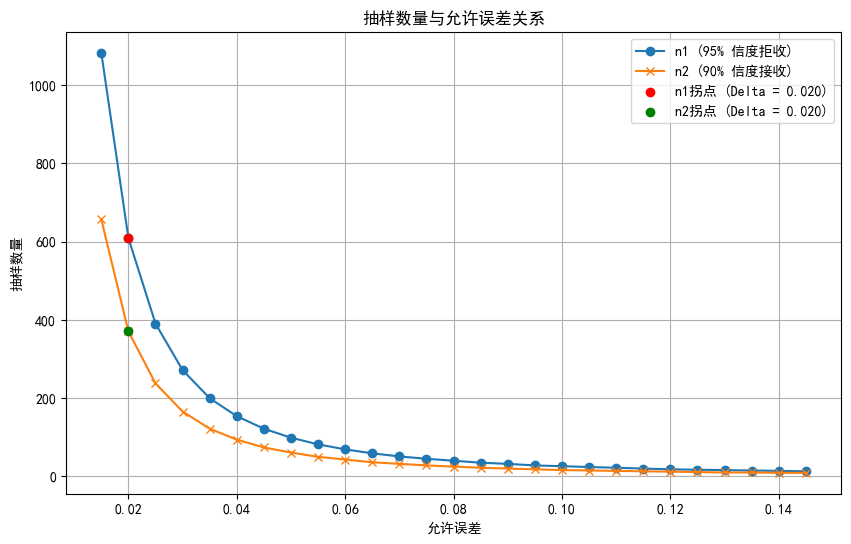

肘部点n1发生在Delta值为: 0.020
肘部点n2发生在Delta值为: 0.020


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# 标称次品率
p0 = 0.10

# 置信水平参数
alpha = 0.05
beta = 0.10
Z_alpha = norm.ppf(1 - alpha)
Z_beta = norm.ppf(1 - beta)

# 设定次品率的差异范围
delta_values = np.arange(0.015, 0.15, 0.005)

# 计算对应每个次品率差异下的样本量
n1_values = [math.ceil((Z_alpha * math.sqrt(p0 * (1 - p0)) / delta) ** 2) for delta in delta_values]
n2_values = [math.ceil((Z_beta * math.sqrt(p0 * (1 - p0)) / delta) ** 2) for delta in delta_values]

# 计算曲率（使用二阶差分法）
def calculate_curvature(y):
    curvature = [0]  # 曲率初始值设为0
    for i in range(1, len(y) - 1):
        kappa = abs(y[i + 1] - 2 * y[i] + y[i - 1])
        curvature.append(kappa)
    curvature.append(0)  # 最后一个点的曲率设为0
    return curvature

curvature_n1 = calculate_curvature(n1_values)
curvature_n2 = calculate_curvature(n2_values)

# 找到曲率最大值的点作为肘部点
elbow_index_n1 = np.argmax(curvature_n1)
elbow_index_n2 = np.argmax(curvature_n2)
elbow_point_n1 = delta_values[elbow_index_n1]
elbow_point_n2 = delta_values[elbow_index_n2]

# 绘制样本量随次品率差异变化的图
plt.figure(figsize=(10, 6))
plt.plot(delta_values, n1_values, label='n1 (95% 信度拒收)', marker='o')
plt.plot(delta_values, n2_values, label='n2 (90% 信度接收)', marker='x')
plt.scatter(elbow_point_n1, n1_values[elbow_index_n1], color='red', label=f'n1拐点 (Delta = {elbow_point_n1:.3f})', zorder=5)
plt.scatter(elbow_point_n2, n2_values[elbow_index_n2], color='green', label=f'n2拐点 (Delta = {elbow_point_n2:.3f})', zorder=5)
plt.xlabel('允许误差')
plt.ylabel('抽样数量')
plt.title('抽样数量与允许误差关系')
plt.legend()
plt.grid(True)
plt.show()

print(f"肘部点n1发生在Delta值为: {elbow_point_n1:.3f}")
print(f"肘部点n2发生在Delta值为: {elbow_point_n2:.3f}")


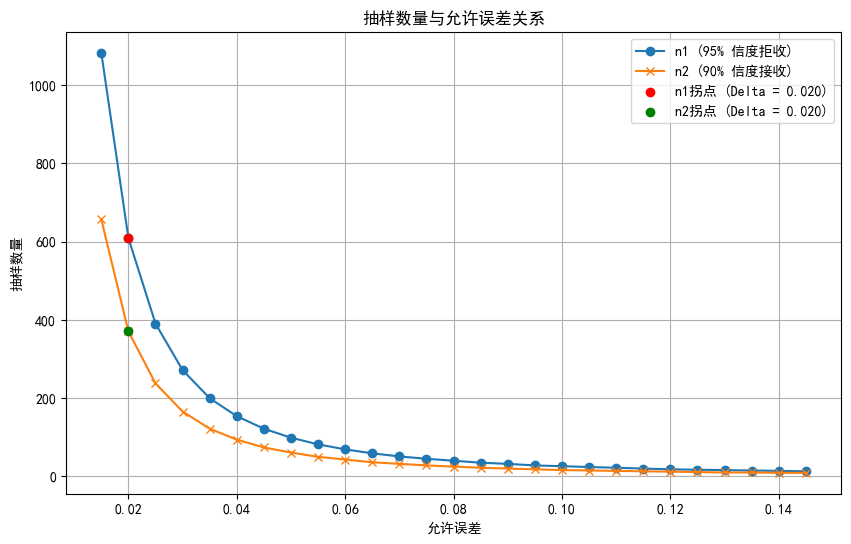

肘部点n1发生在Delta值为: 0.020
肘部点n2发生在Delta值为: 0.020


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# 标称次品率
p0 = 0.10

# 置信水平参数
alpha = 0.05
beta = 0.10
Z_alpha = norm.ppf(1 - alpha)
Z_beta = norm.ppf(1 - beta)

# 设定次品率的差异范围
delta_values = np.arange(0.015, 0.15, 0.005)

# 计算对应每个次品率差异下的样本量
n1_values = [math.ceil((Z_alpha * math.sqrt(p0 * (1 - p0)) / delta) ** 2) for delta in delta_values]
n2_values = [math.ceil((Z_beta * math.sqrt(p0 * (1 - p0)) / delta) ** 2) for delta in delta_values]

# 计算曲率（使用二阶差分法）
def calculate_curvature(y):
    curvature = [0]  # 曲率初始值设为0
    for i in range(1, len(y) - 1):
        kappa = abs(y[i + 1] - 2 * y[i] + y[i - 1])
        curvature.append(kappa)
    curvature.append(0)  # 最后一个点的曲率设为0
    return curvature

curvature_n1 = calculate_curvature(n1_values)
curvature_n2 = calculate_curvature(n2_values)

# 将数据保存到CSV文件
df = pd.DataFrame({
    'Delta': delta_values,
    'n1_values': n1_values,
    'n2_values': n2_values,
    'Curvature_n1': curvature_n1,
    'Curvature_n2': curvature_n2
})
df.to_csv('Q1_re/curvature_data.csv', index=False)

# 找到曲率最大值的点作为肘部点
elbow_index_n1 = np.argmax(curvature_n1)
elbow_index_n2 = np.argmax(curvature_n2)
elbow_point_n1 = delta_values[elbow_index_n1]
elbow_point_n2 = delta_values[elbow_index_n2]

# 绘制样本量随次品率差异变化的图
plt.figure(figsize=(10, 6))
plt.plot(delta_values, n1_values, label='n1 (95% 信度拒收)', marker='o')
plt.plot(delta_values, n2_values, label='n2 (90% 信度接收)', marker='x')
plt.scatter(elbow_point_n1, n1_values[elbow_index_n1], color='red', label=f'n1拐点 (Delta = {elbow_point_n1:.3f})', zorder=5)
plt.scatter(elbow_point_n2, n2_values[elbow_index_n2], color='green', label=f'n2拐点 (Delta = {elbow_point_n2:.3f})', zorder=5)
plt.xlabel('允许误差')
plt.ylabel('抽样数量')
plt.title('抽样数量与允许误差关系')
plt.legend()
plt.grid(True)
plt.show()

print(f"肘部点n1发生在Delta值为: {elbow_point_n1:.3f}")
print(f"肘部点n2发生在Delta值为: {elbow_point_n2:.3f}")


In [25]:
import os
import numpy as np
import pandas as pd

# 初始样本量 n1 和 n2
n1 = 609
n2 = 370

# 总体数量的范围，N 低于 10000
N = np.arange(100, 10001, 100)

# 修正后的样本量公式
def adjusted_sample_size(n, N):
    return np.round(n / (1 + (n - 1) / N))

# 计算修正样本量，并取整
n1_adjusted = adjusted_sample_size(n1, N)
n2_adjusted = adjusted_sample_size(n2, N)

# 创建 DataFrame 存储结果
df = pd.DataFrame({
    'N': N,
    'n1_adjusted': n1_adjusted.astype(int),
    'n2_adjusted': n2_adjusted.astype(int)
})


df.to_csv("Q1_re/adjusted_sample_sizes.csv", index=False)




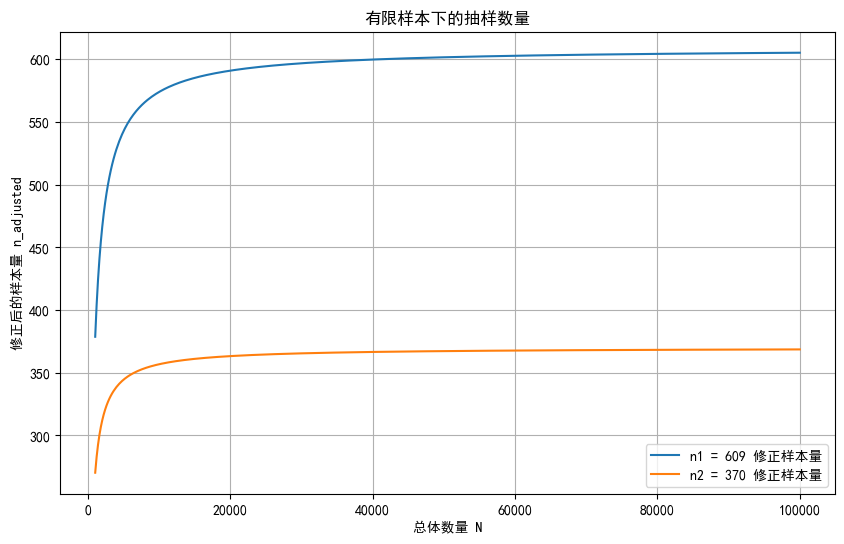

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 初始样本量 n1 和 n2
n1 = 609
n2 = 370

# 总体数量的范围
N = np.linspace(1000, 100000, 500)

# 修正后的样本量公式
def adjusted_sample_size(n, N):
    return n / (1 + (n - 1) / N)

# 计算修正样本量
n1_adjusted = adjusted_sample_size(n1, N)
n2_adjusted = adjusted_sample_size(n2, N)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(N, n1_adjusted, label='n1 = 609 修正样本量')
plt.plot(N, n2_adjusted, label='n2 = 370 修正样本量')
plt.xlabel('总体数量 N')
plt.ylabel('修正后的样本量 n_adjusted')
plt.title('有限样本下的抽样数量')
plt.legend()
plt.grid(True)
plt.show()
